<a href="https://colab.research.google.com/github/jenxing/Coursera-Python-for-Data-Science-and-AI-Courses/blob/master/Assignment_5_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Josh Enxing**

**Date: 19NOV2022**

**Course: BU MET CS677**

**NB: It is against MET academic integrity policy to share or distribute these solutions. Anyone found violating this policy will be reported to the Dean's office.**

# Question 1

In [ ]:
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [ ]:
import pandas as pd
import numpy as np

# Import data
data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls", sheet_name='Raw Data', header=0)
data = data.dropna(subset=['NSP'])

# Assign label of 1 to rows where NSP=1, 0 to rows where NSP not equal to 1
data['NSP'] = np.where(data["NSP"]==1,1,0)
data.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

# Group Selection and Train_Test_Split

In [ ]:
def pick_group_n(df, group_no):
  if group_no==1:
    return df[['LB','ALTV','Min','Mean','NSP']].dropna()
  elif group_no==2:
    return df[['ASTV', 'MLTV', 'Max', 'Median','NSP']].dropna()
  elif group_no==3:
    return df[['MSTV', 'Width', 'Mode', 'Variance','NSP']].dropna()
  elif group_no==4:
    return df[['LB', 'MLTV', 'Width', 'Variance','NSP']].dropna()
  else:
    raise Exception("Please enter only values 1,2,3, or 4 for group_no")

In [ ]:
from sklearn.model_selection import train_test_split

df = pick_group_n(data,1) # change this to see values for your group choice
features = df.iloc[:,0:4]
label = df.iloc[:,4]

# random_state = 0 so that data split is same each time this is run
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, stratify=label, random_state=0)

# Question 2

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.53      0.59       236
           1       0.87      0.92      0.90       827

    accuracy                           0.84      1063
   macro avg       0.77      0.73      0.74      1063
weighted avg       0.83      0.84      0.83      1063



Accuracy overall not bad, but recall on the 0 class is 0.5, same as a coin flip. So while this model makes good predictions on class 1, the predictions are not better than random chance on class 0. This is due to the dataset being imbalanced, see https://imbalanced-learn.org/stable/index.html for how to deal with this situation in practice.

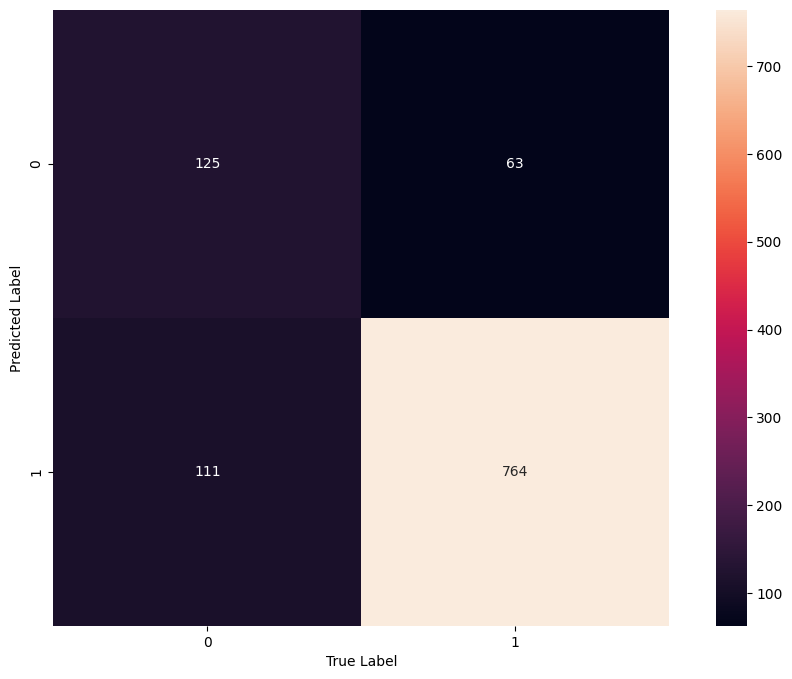

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8) # making figure bigger

mat1 = confusion_matrix(y_test, y_pred)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Question 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       236
           1       0.93      0.91      0.92       827

    accuracy                           0.88      1063
   macro avg       0.82      0.84      0.83      1063
weighted avg       0.88      0.88      0.88      1063



Similar overall accuracy to Naive Bayes, but better recall on the negative class, better precision on positive class.

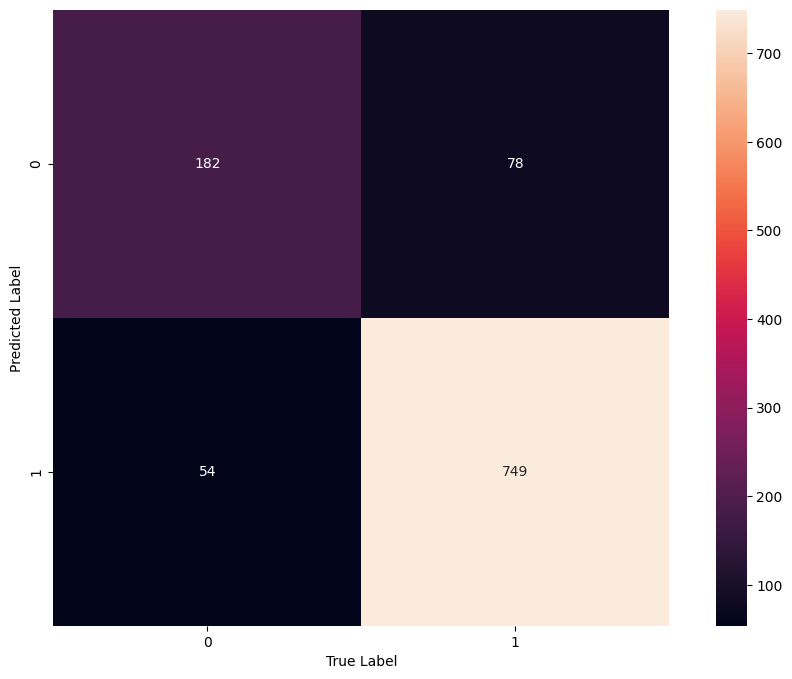

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat2 = confusion_matrix(y_test, y_pred)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Question 4

The matplotlib.pyplot.imshow() function is just one way to plot the errors, you can use a contour plot, multiple 2D graphs, etc. In practice, usually something like the [GridSearchCV class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) is used for hyperparameter tuning in a more automatic way.

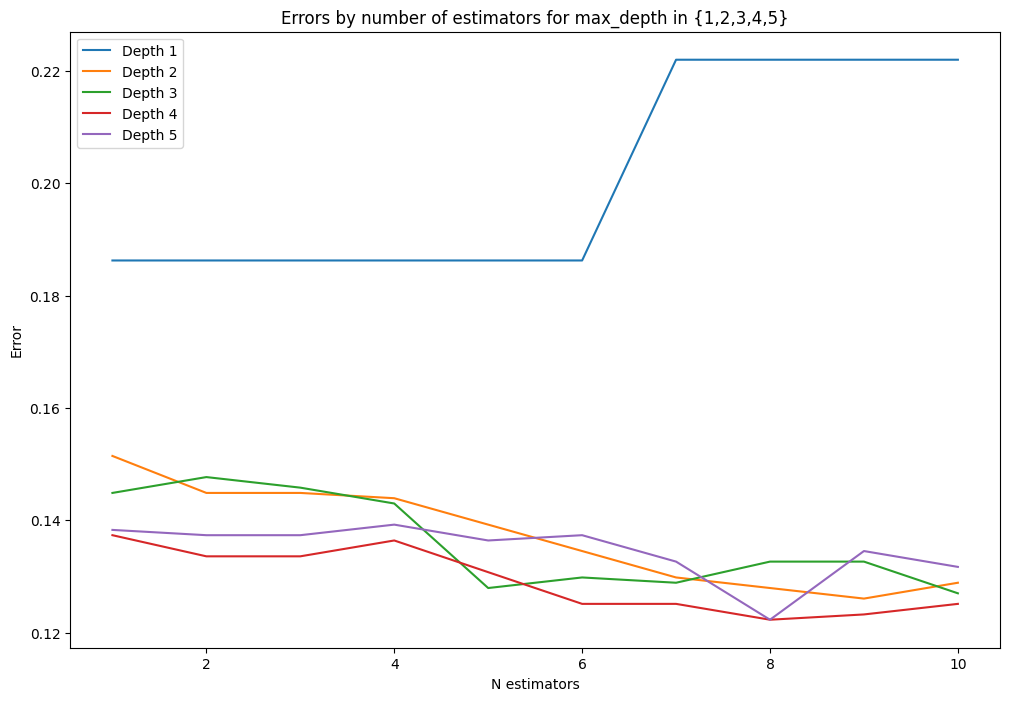

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Function for going through all hyperparameters
def test_hyperparameters(N,d):
  # Random_state = 0 so that this gives the same performance for each run
  rf = RandomForestClassifier(n_estimators=N, max_depth=d, random_state=0)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  return 1-accuracy_score(y_test,y_pred)

errors = np.empty([10,5])

for N in range(1,11):
  for d in range(1,6):
    errors[N-1][d-1] = test_hyperparameters(N,d)

df = pd.DataFrame(errors, columns = ['Depth 1','Depth 2','Depth 3','Depth 4','Depth 5'], index = range(1,11))
df.plot()
plt.xlabel("N estimators")
plt.ylabel("Error")
plt.title("Errors by number of estimators for max_depth in {1,2,3,4,5}")
plt.show()

In [ ]:
vals = np.unravel_index(np.argmin(errors, axis=None), errors.shape) # finds row and column of minimum value in errors array
print("So this means that N =",vals[0]+1,"and d =",vals[1]+1,"gives the minimum error (i.e. maximum accuracy)")

So this means that N = 8 and d = 4 gives the minimum error (i.e. maximum accuracy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=vals[0]+1, max_depth=vals[1]+1, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       236
           1       0.90      0.94      0.92       827

    accuracy                           0.88      1063
   macro avg       0.83      0.80      0.81      1063
weighted avg       0.87      0.88      0.87      1063



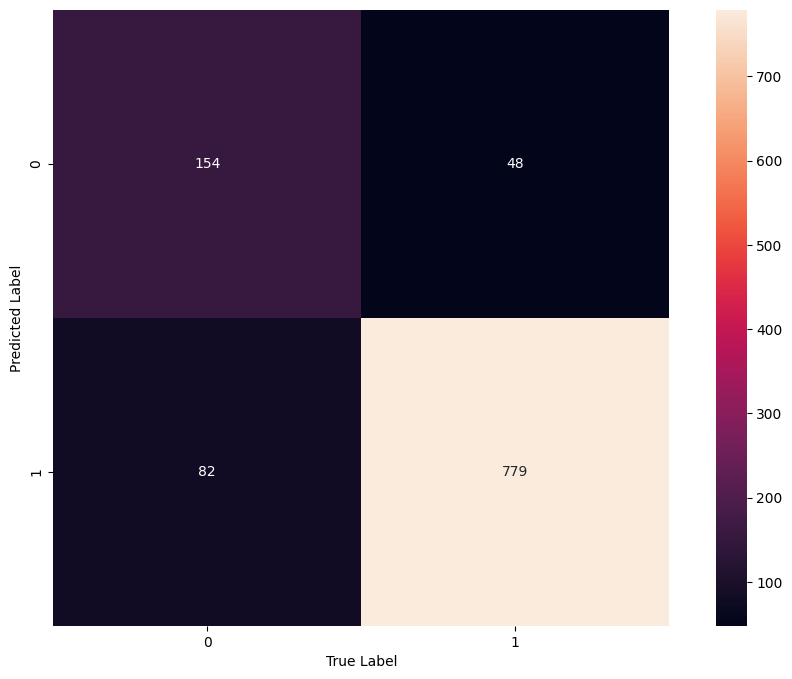

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat3 = confusion_matrix(y_test, y_pred)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

# Question 5

In [ ]:
import pandas as pd

def compute_metrics(cm,alg):
  TP = cm[0][0]
  FN = cm[0][1]
  FP = cm[1][0]
  TN = cm[1][1]
  TPR = TP / (TP+FN)
  TNR = TN / (TN+FP)
  accuracy = (TP+TN)/ (TP+TN+FP+FN)
  return {"Algorithm": alg, "True Positives": TP, "False Positives": FP, "True Negatives": TN,
              "False Negatives": FN, "Accuracy": round(accuracy,3),
          "True Positive Rate": round(TPR,3), "True Negative Rate": round(TNR,3)}

df = pd.DataFrame([compute_metrics(mat1,"Naive Bayes"),compute_metrics(mat2, "Decision Tree"),compute_metrics(mat3, "Random Forest")])
df = df.set_index("Algorithm")
df

,True Positives,False Positives,True Negatives,False Negatives,Accuracy,True Positive Rate,True Negative Rate
Algorithm,,,,,,,
Naive Bayes,125,63,764,111,0.836,0.530,0.924
Decision Tree,182,78,749,54,0.876,0.771,0.906
Random Forest,154,48,779,82,0.878,0.653,0.942
